In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import warnings
import logging

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Create logs directory if it doesn't exist
os.makedirs('../logs', exist_ok=True)

# Set up logger
logging.basicConfig(filename="../logs/eda.log", level=logging.INFO)

# Append the root directory to the system path
import sys
sys.path.append('..')

# Import the EDA class from scripts.mainEda
from scripts.mainEda import EDA

# Initialize the EDA class with the paths to your data files
eda = EDA(train_path='../data/train.csv', test_path='../data/test.csv', store_path='../data/store.csv')

# Document the purpose of this cell
# This cell imports the necessary libraries and sets up logging.
# It also initializes the EDA class with the specified data paths.

In [4]:
# Load datasets using the EDA class
train_data = eda.load_data('../data/train.csv')
test_data = eda.load_data('../data/test.csv')
store_data = eda.load_data('../data/store.csv')

# Document the purpose of this cell
# This cell loads the train, test, and store datasets using the EDA class.
# The datasets are stored in train_data, test_data, and store_data variables respectively.

In [5]:
# Load the store dataset using the EDA class
store_data = eda.load_data('../data/store.csv')

# Check the first few rows of the dataset
store_data.head()

# Document the purpose of this cell
# This cell loads the store dataset using the EDA class and previews the first few rows of the dataset.
# The store_data variable will contain the loaded store data.


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Data Overview
eda.data_overview(store_data)

# Document the purpose of this cell
# This cell calls the data_overview function from the EDA class to print a detailed overview of the store_data dataset.
# It provides information on the shape, columns, data types, and descriptive statistics of the dataset.


Dataset Shape: (1115, 10)
Columns: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterva

Missing Values:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


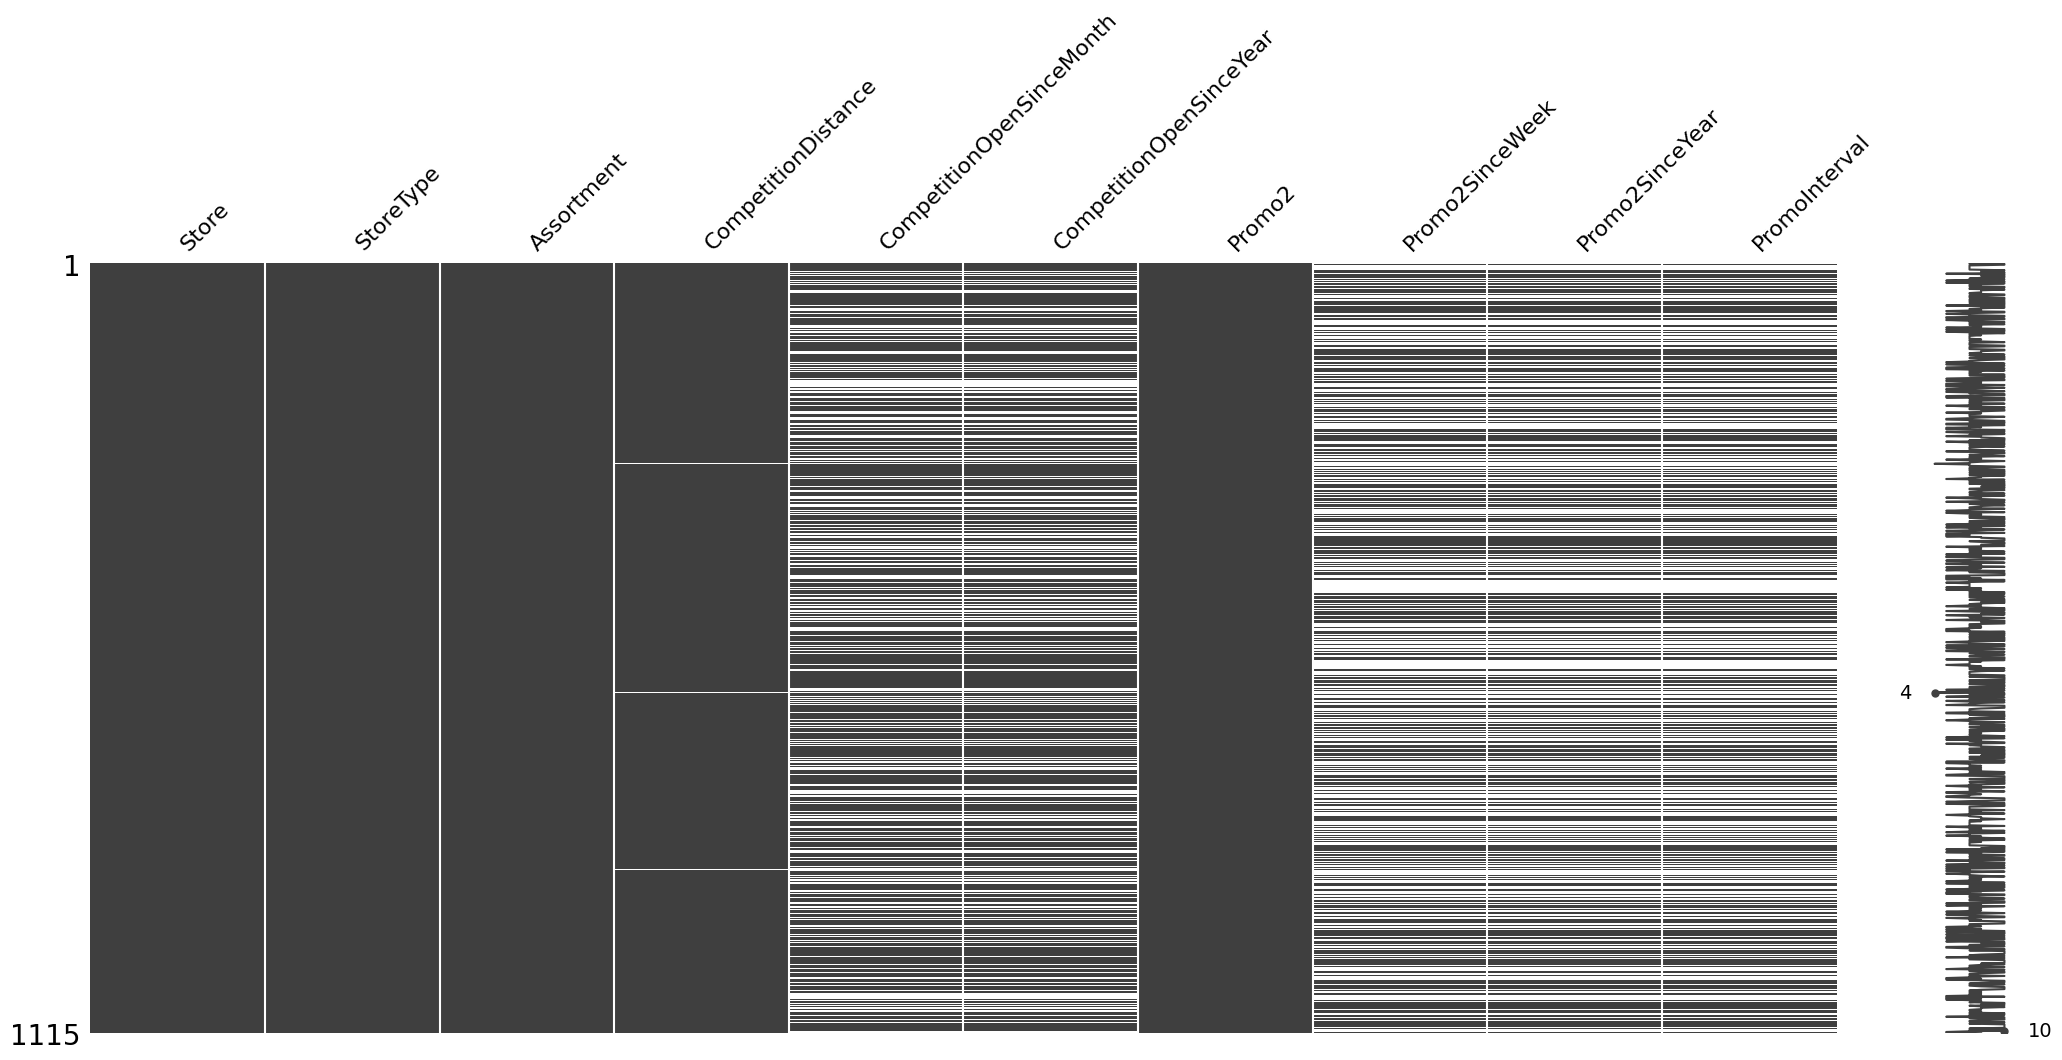

In [7]:
# Check for missing values in the store data
eda.check_missing_values(store_data)

# Document the purpose of this cell
# This cell calls the check_missing_values function from the EDA class to check and visualize missing values in the store_data dataset.


Missing Values:
Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
CompetitionOpenSince            0
Promo2Since                  1115
dtype: int64


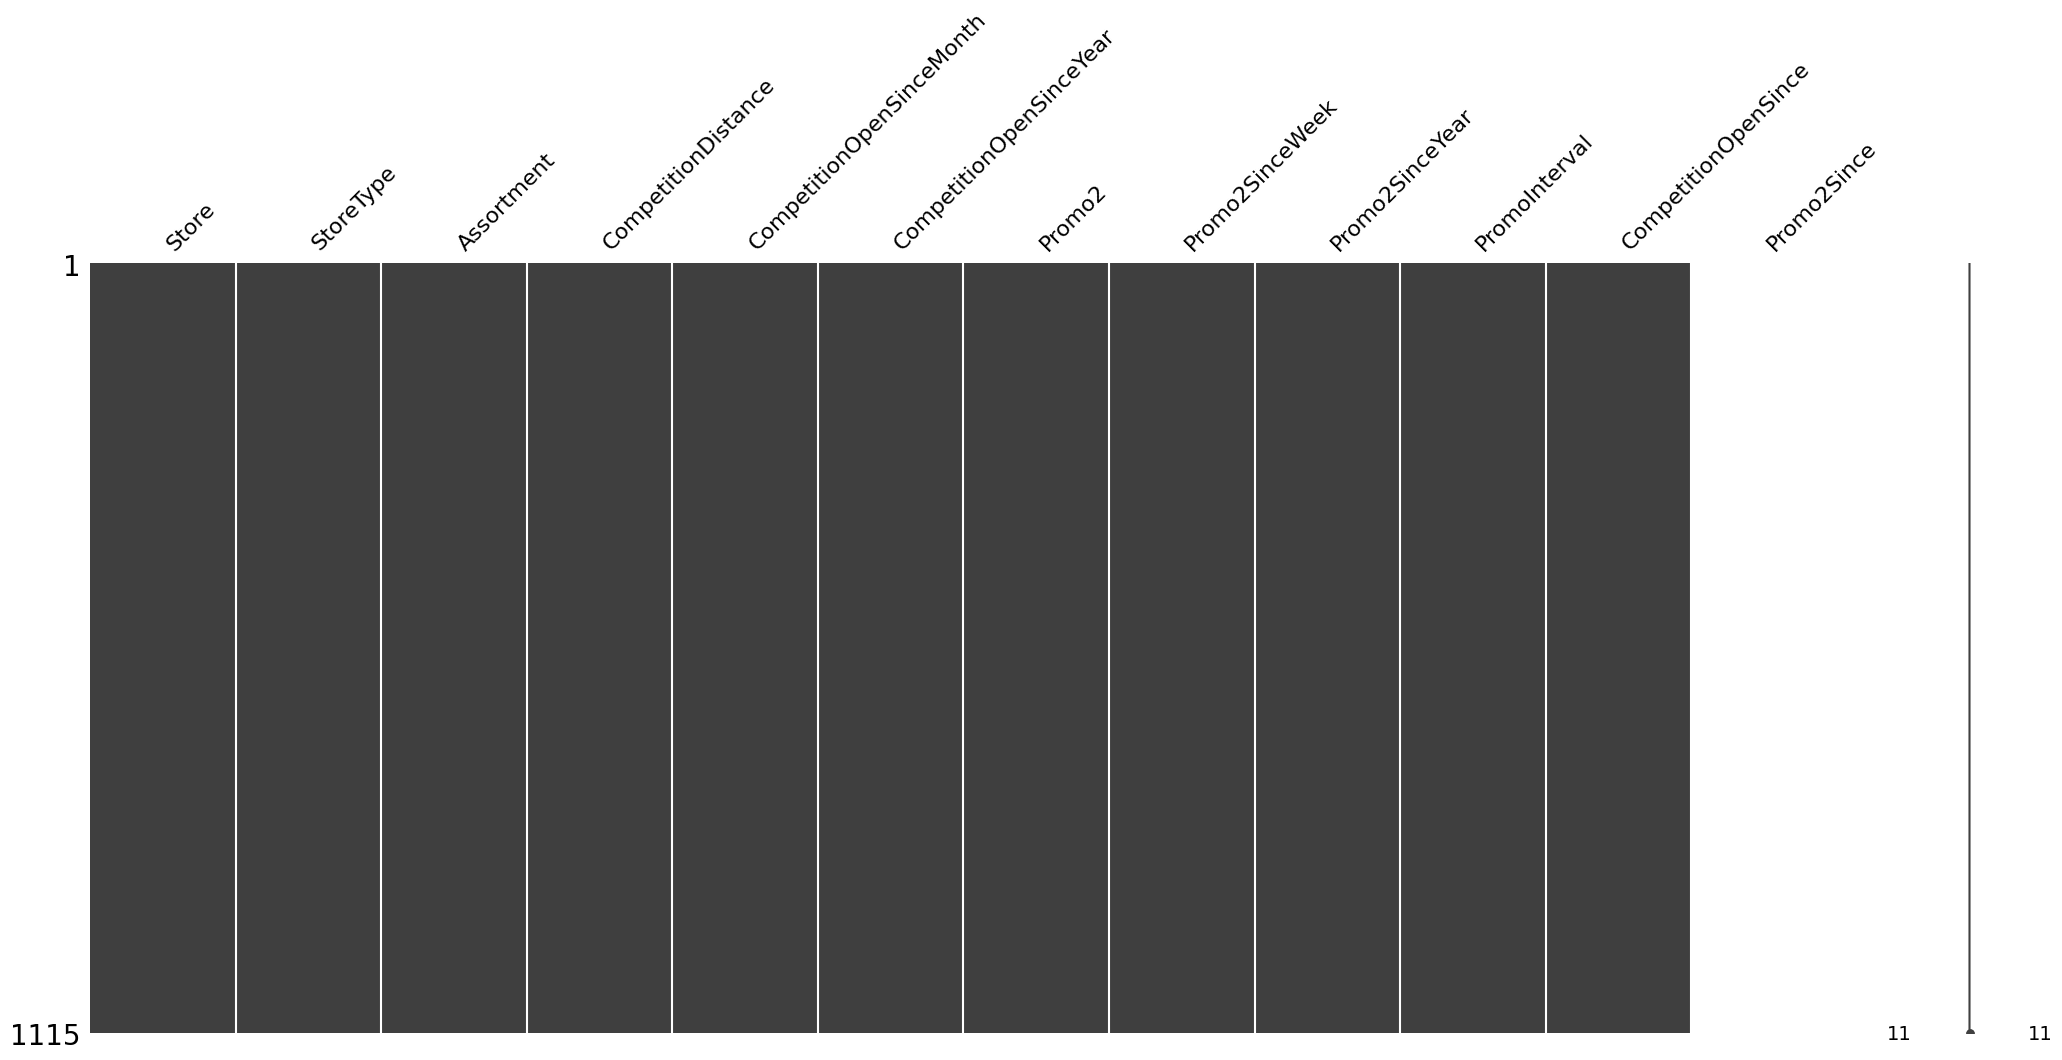

In [8]:
# Handle missing values in the store data using the EDA class
eda.handle_missing_values()

# Check for missing values in the store data after handling missing values
eda.check_missing_values(eda.store)

# Document the purpose of this cell
# This cell calls the handle_missing_values and check_missing_values functions from the EDA class.
# It handles missing values in the store data and then checks for any remaining missing values.


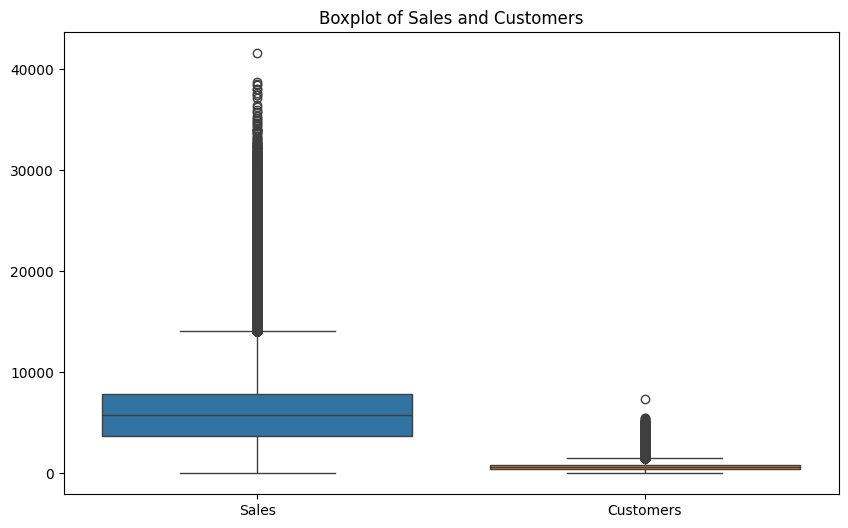

In [9]:
# Visualize outliers in sales and customer count using the EDA class
eda.visualize_outliers(eda.train, ['Sales', 'Customers'], "Boxplot of Sales and Customers")

# Document the purpose of this cell
# This cell calls the visualize_outliers function from the EDA class to create a boxplot for visualizing outliers in sales and customer count.
# The boxplot helps in identifying any extreme values in these columns.


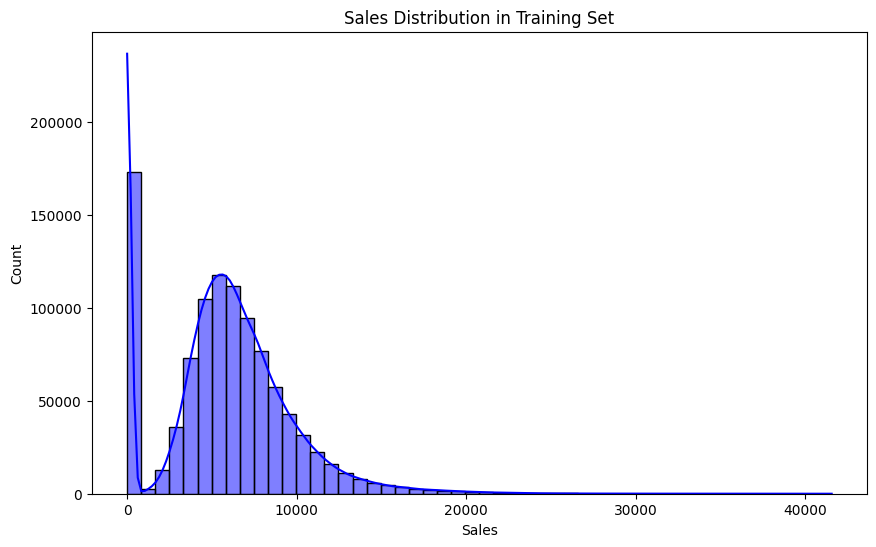

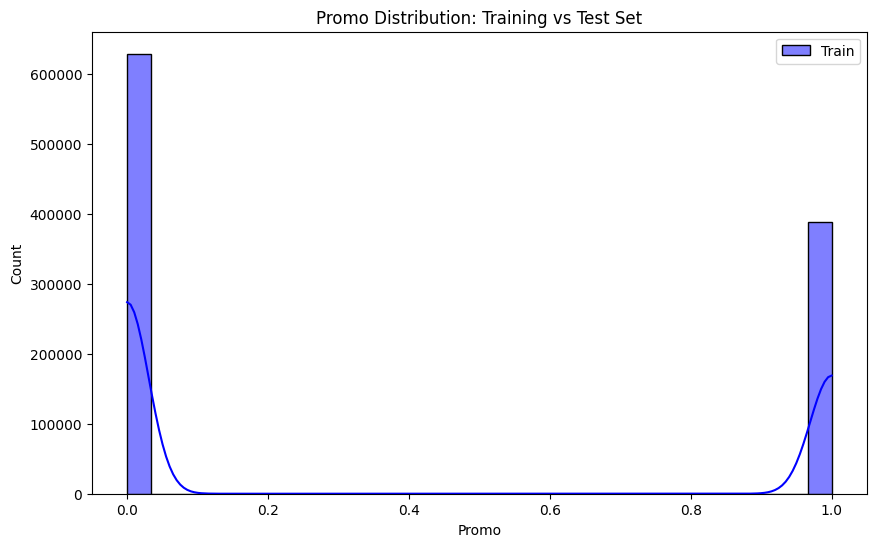

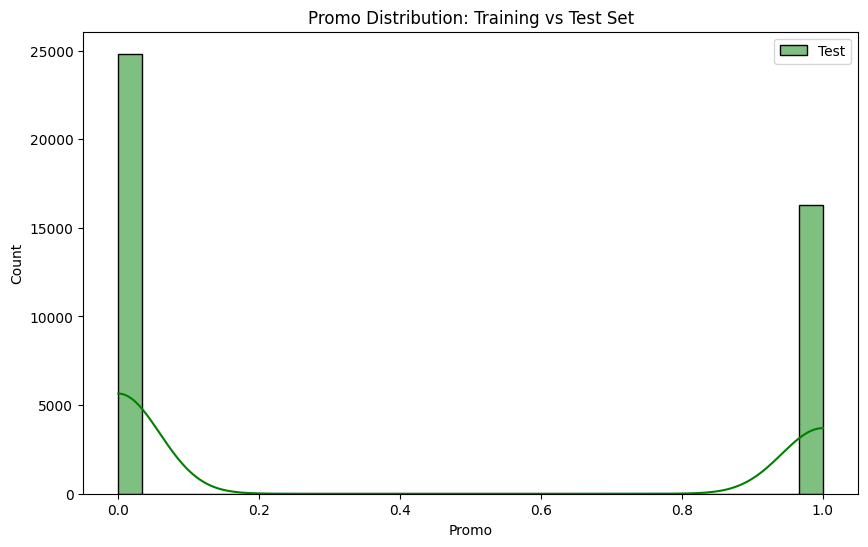

In [10]:
# Plotting sales distribution in training set using the EDA class
eda.plot_distribution(eda.train, 'Sales', 'Sales Distribution in Training Set', bins=50)

# Compare promo distribution in training and test set using the EDA class
eda.plot_distribution(eda.train, 'Promo', 'Promo Distribution: Training vs Test Set', bins=30, color='blue', label='Train', kde=True)
eda.plot_distribution(eda.test, 'Promo', 'Promo Distribution: Training vs Test Set', bins=30, color='green', label='Test', kde=True)

# Document the purpose of this cell
# This cell calls the plot_distribution function from the EDA class to plot the distribution of sales in the training set.
# It also compares the promo distribution between the training and test sets.


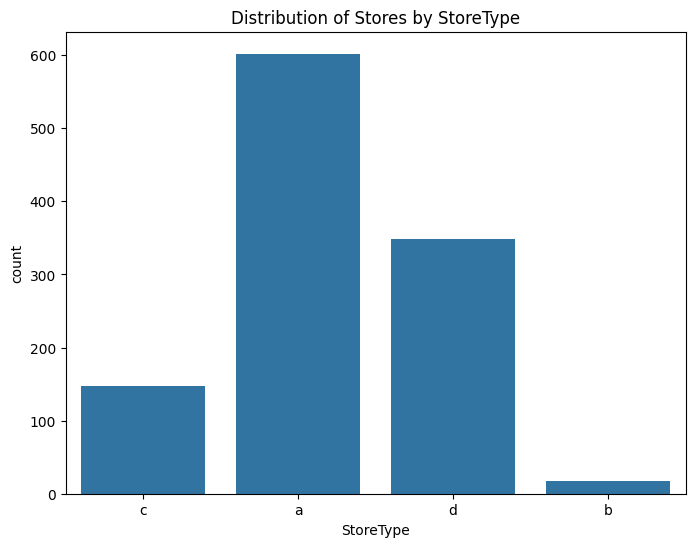

In [11]:
# Visualize the distribution of store types using the EDA class
eda.distribution_plot('StoreType', eda.store, "Distribution of Stores by StoreType")

# Document the purpose of this cell
# This cell calls the distribution_plot function from the EDA class to visualize the distribution of store types.
# The countplot helps in understanding the number of stores for each store type.


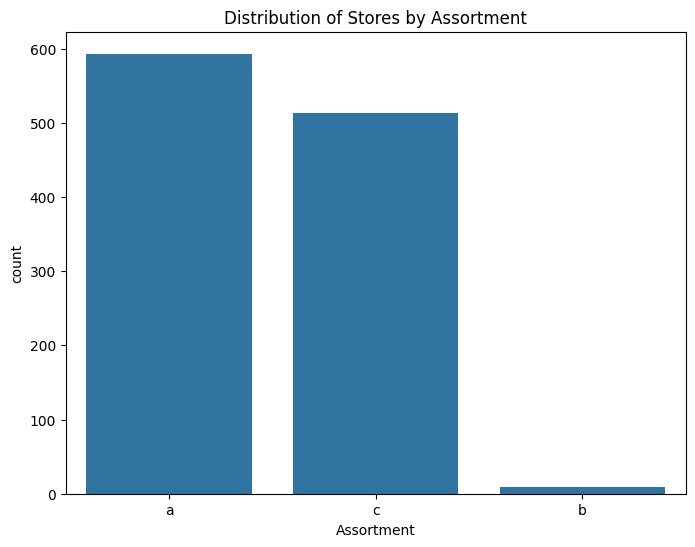

In [12]:
# Visualize the distribution of assortment types using the EDA class
eda.distribution_plot('Assortment', eda.store, "Distribution of Stores by Assortment")

# Document the purpose of this cell
# This cell calls the distribution_plot function from the EDA class to visualize the distribution of assortment types.
# The countplot helps in understanding the number of stores for each assortment type.


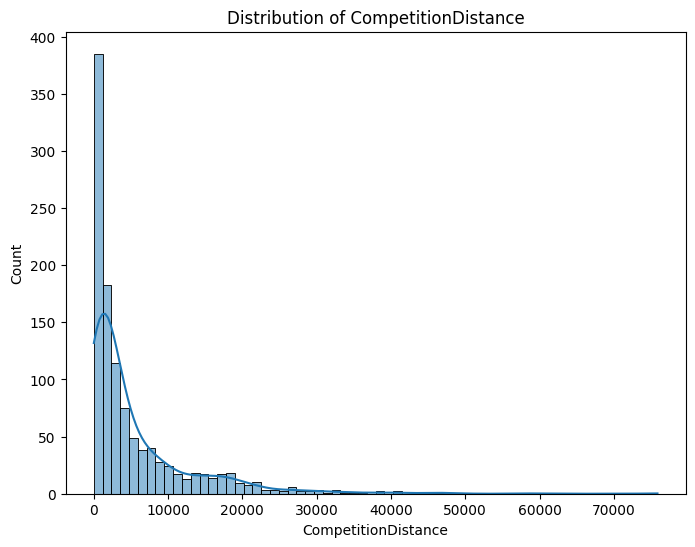

In [13]:
# Visualize the distribution of CompetitionDistance using the EDA class
eda.distribution_plot('CompetitionDistance', eda.store, 'Distribution of CompetitionDistance', plot_type='histplot')

# Document the purpose of this cell
# This cell calls the distribution_plot function from the EDA class to visualize the distribution of CompetitionDistance.
# The histogram plot helps in understanding the distribution and density of competition distances among stores.


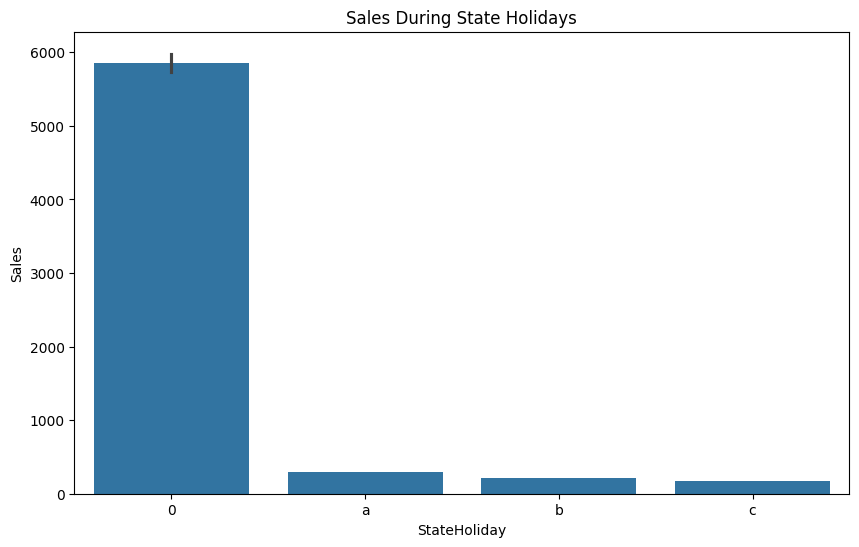

In [14]:
# Analyze sales during holidays using the EDA class
eda.holiday_sales_analysis()

# Document the purpose of this cell
# This cell calls the holiday_sales_analysis function from the EDA class to analyze sales behavior before, during, and after state holidays.
# It visualizes the average sales for each state holiday using a bar plot.


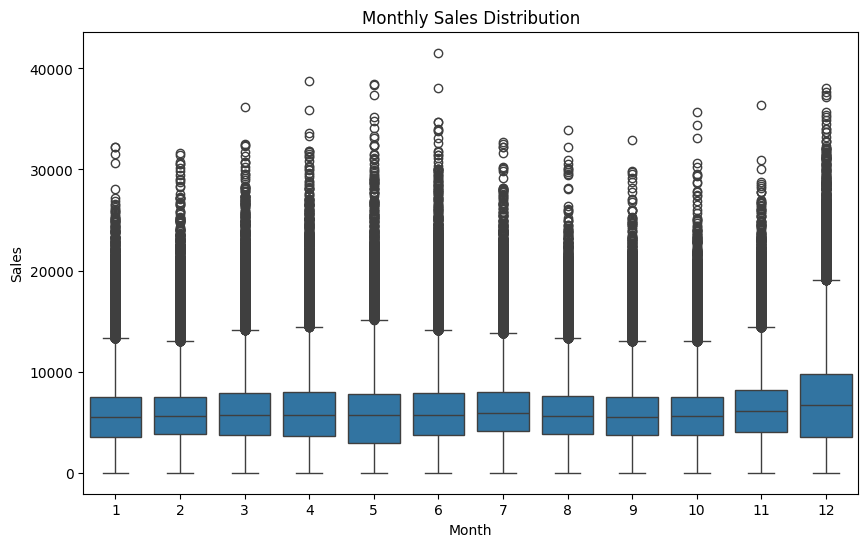

In [16]:
# Visualize seasonal sales trends using the EDA class
eda.seasonal_sales_trends()

# Document the purpose of this cell
# This cell calls the seasonal_sales_trends function from the EDA class to identify seasonal patterns in sales, such as peaks during Christmas or Easter.
# It visualizes the monthly sales distribution using a boxplot.


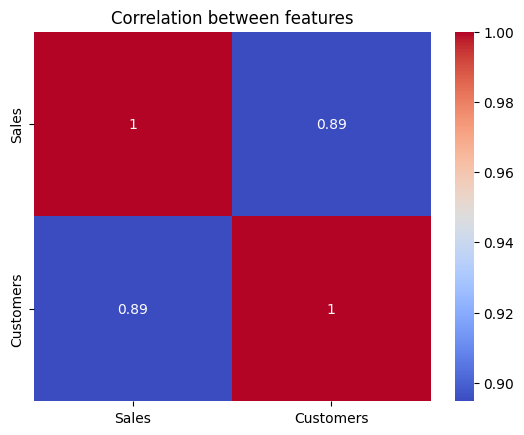

In [15]:
# Perform correlation analysis between sales and customers using the EDA class
eda.correlation_analysis(eda.train[['Sales', 'Customers']])

# Document the purpose of this cell
# This cell calls the correlation_analysis function from the EDA class to investigate the correlation between sales and customers.
# It visualizes the correlation using a heatmap.


In [17]:
# Label encode columns and get the correlation matrix using the EDA class
correlation_matrix = eda.label_encode_columns()

# Display correlation matrix
correlation_matrix

# Document the purpose of this cell
# This cell calls the label_encode_columns function from the EDA class to label encode categorical columns ('StoreType', 'Assortment', and 'PromoInterval') and calculate the correlation matrix.
# It then displays the correlation matrix to analyze the relationships between all columns.


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
Store,1.000000,-0.020977,0.003913,-0.027325,-0.038123,-0.001570,0.007486,0.008178,0.029668,-0.011256,-0.003157,NaN
StoreType,-0.020977,1.000000,0.234372,0.079396,0.038731,0.045918,0.086597,0.022939,-0.024305,-0.070205,0.047378,NaN
Assortment,0.003913,0.234372,1.000000,0.144890,0.037398,0.091546,-0.000057,-0.053155,0.031808,0.030929,0.092811,NaN
CompetitionDistance,-0.027325,0.079396,0.144890,1.000000,-0.047199,0.019890,-0.145098,-0.089109,-0.096428,0.130435,0.017833,NaN
CompetitionOpenSinceMonth,-0.038123,0.038731,0.037398,-0.047199,1.000000,0.062675,0.019285,0.012050,0.011632,-0.022730,0.104531,NaN
CompetitionOpenSinceYear,-0.001570,0.045918,0.091546,0.019890,0.062675,1.000000,-0.023852,-0.027471,-0.028571,0.017233,0.999118,NaN
Promo2,0.007486,0.086597,-0.000057,-0.145098,0.019285,-0.023852,1.000000,0.428576,0.303660,-0.912003,-0.022962,NaN
Promo2SinceWeek,0.008178,0.022939,-0.053155,-0.089109,0.012050,-0.027471,0.428576,1.000000,-0.057221,-0.405449,-0.026859,NaN
Promo2SinceYear,0.029668,-0.024305,0.031808,-0.096428,0.011632,-0.028571,0.303660,-0.057221,1.000000,-0.221902,-0.027998,NaN
PromoInterval,-0.011256,-0.070205,0.030929,0.130435,-0.022730,0.017233,-0.912003,-0.405449,-0.221902,1.000000,0.016222,NaN


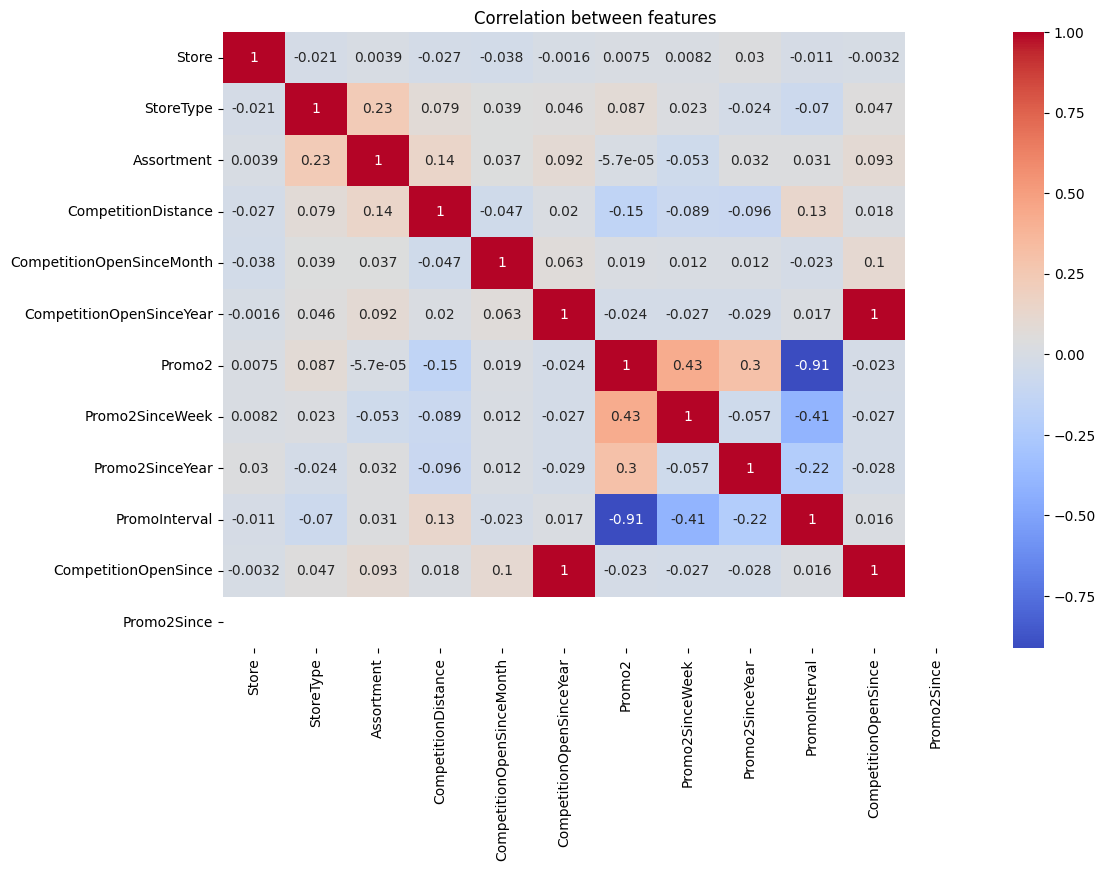

In [18]:
# Label encode columns and get the correlation matrix using the EDA class
correlation_matrix = eda.label_encode_columns()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

# Document the purpose of this cell
# This cell calls the label_encode_columns function from the EDA class to label encode categorical columns and calculate the correlation matrix.
# It then visualizes the correlation matrix using a heatmap to analyze the relationships between all features.


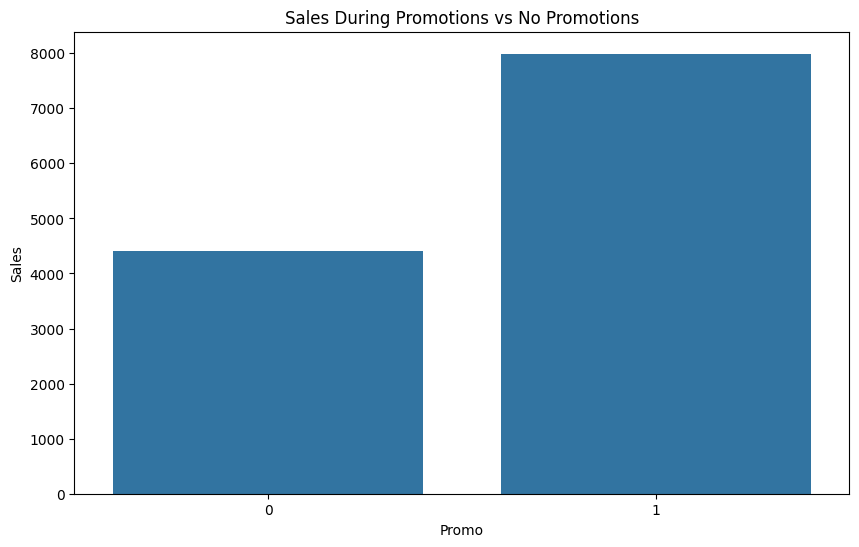

In [19]:
# Analyze the effect of promotions on sales using the EDA class
eda.promo_analysis()

# Document the purpose of this cell
# This cell calls the promo_analysis function from the EDA class to analyze how promotions impact sales and customer behavior.
# It visualizes the average sales during promotions vs no promotions using a bar plot.


In [20]:
# Analyze the effect of promos on sales using the EDA class
eda.promo2_analysis()

# Document the purpose of this cell
# This cell calls the promo2_analysis function from the EDA class to analyze the effect of Promo2 on CompetitionDistance.
# It prints the average CompetitionDistance for stores with and without Promo2.


Average CompetitionDistance with Promo2: 
Promo2
0    6533.988971
1    4313.021016
Name: CompetitionDistance, dtype: float64


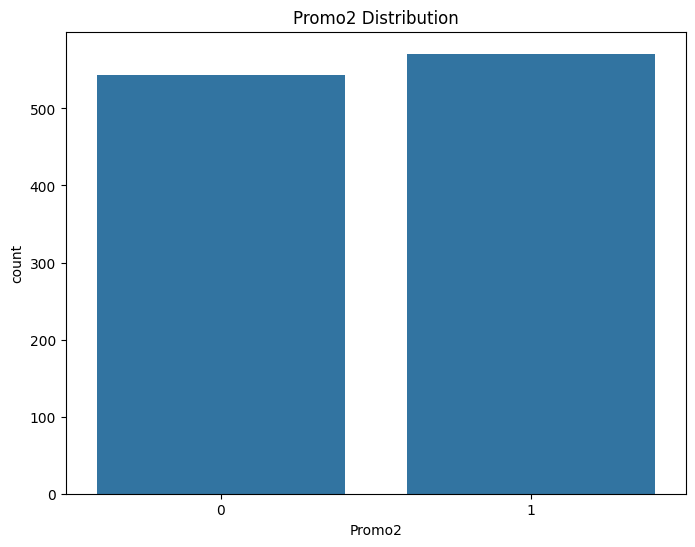

In [21]:
# Visualize the distribution of Promo2 using the EDA class
eda.promo2_distribution_analysis()

# Document the purpose of this cell
# This cell calls the promo2_distribution_analysis function from the EDA class to visualize the distribution of Promo2.
# The countplot helps in understanding the number of stores that participate in Promo2.


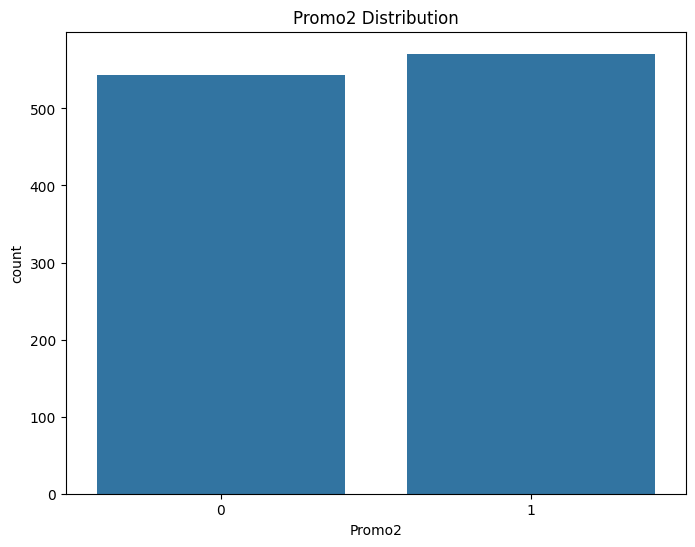

In [22]:
# Visualize the distribution of Promo2 using the EDA class
eda.promo2_distribution_analysis()

# Document the purpose of this cell
# This cell calls the promo2_distribution_analysis function from the EDA class to visualize the distribution of Promo2.
# The countplot helps in understanding the number of stores that participate in Promo2.


In [ ]:
# Analyze the effect of assortment types on sales using the EDA class
eda.assortment_sales_analysis()

# Document the purpose of this cell
# This cell calls the assortment_sales_analysis function from the EDA class to check the impact of different store assortments on sales.
# It visualizes the average sales by assortment type using a boxplot.


In [23]:
# Analyze the effect of competition on stores using the EDA class
eda.competition_effect_analysis()

# Document the purpose of this cell
# This cell calls the competition_effect_analysis function from the EDA class to explore how the distance to competitors affects sales.
# It prints the average CompetitionDistance for stores with and without competition.


Effect of having competition on stores: 
HasCompetition
1    5396.61435
Name: CompetitionDistance, dtype: float64


In [24]:
# Analyze the effect of competitor distance on stores in city centers using the EDA class
eda.city_center_analysis()

# Document the purpose of this cell
# This cell calls the city_center_analysis function from the EDA class to analyze how competitor distance affects stores in city centers.
# It prints the average CompetitionDistance for stores located in city centers vs non-city centers.


Effect of being in city center on stores: 
IsCityCenter
0    6662.810056
1     245.500000
Name: CompetitionDistance, dtype: float64


In [25]:
# Conclusion
logging.info("Exploratory data analysis completed for Task-1. Insights and visualizations generated.")

# Document the purpose of this cell
# This cell logs the completion of the exploratory data analysis for Task-1 and indicates that the insights and visualizations have been generated.
